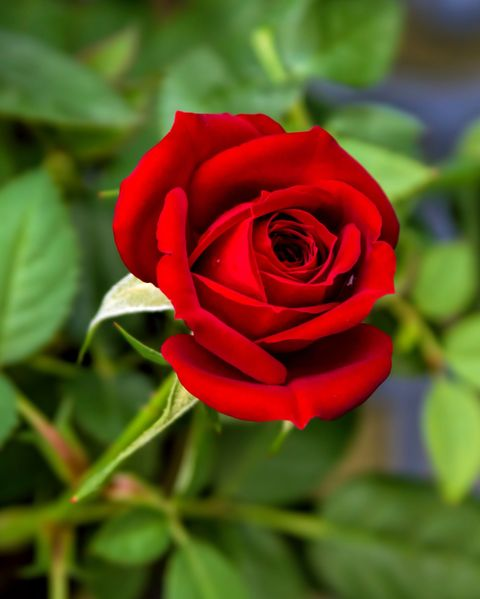

# CAPSTONE PROJECT - ML ZOOMCAMP

# Flower Recognition Project
   - **Build a model to recognize the name of a flower**

*Subramanian Hariharan*

## Problem Statement

Mr X, the  owner of a flower boutique, is a person who faces difficulty in recalling the names of the flowers. He remembers that he had practised deep learning during his college days which can help him in building a machine that would recognize the different flowers. But he hardly remembers all the tools to be used. So he seeks help from his old friend, that is you. Will you help him build a deep learning model?

Usually he sells 5 different flower collections - daisy, dandelion, roses, sunflowers and tulips.

**The problem statement in concise words is to to develop a ML model which can identify name of the flower from the image and classify into one of the five classes**

The problem has been attempted from folllowing practice datathon
https://dphi.tech/challenges/data-sprint-25-flower-recognition/61/overview/about

### Evaluation Criteria

Submissions are evaluated using Accuracy Score on the dphi website.



##About the Data


The dataset contains raw jpeg images of five types of flowers. 

The dataset can be downloaded from the given link: https://drive.google.com/file/d/1H0rJmSBmYQoWM2w2tqy-jmX0Y2Wg6k2v/view?usp=sharing

From the above link you will be able to download a zip file named ‘flowers.zip’. After you extract this zip file, you will get four files:

train - contains all the images that are to be used for training your model.  In this folder you will find five folders namely - ‘daisy’, ‘dandelion’, ‘rose’, ‘sunflower’ and ‘tulip’ which contain the images of the respective flowers

test - contains 924 flowers images. For these images you are required to make predictions as the respective flower names - ‘daisy’, ‘dandelion’, ‘rose’, ‘sunflower’ and ‘tulip’

Testing_set_flower.csv - this is the order of the predictions for each image that is to be submitted on the platform. Make sure the predictions you download are with their image’s filename in the same order as given in this file.

sample_submission: This is a csv file that contains the sample submission for the data sprint.

**Acknowledgement**

All images provided in this data sprint are licensed under the Creative Commons By-Attribution License, available at:

https://creativecommons.org/licenses/by/2.0/

The photographers are listed in this file, thanks to all of them for making their work available. However, you will observe the image file names are different in this file than those we have provided. The file names are changed solely for the purpose of the data sprint.

 

I have downloaded the zipfile and uoloaded on the google colab for the generation of solution . I will unzip the files and prepare the data for further model generation.

It is seen that entire train data of images are in 5 files with folder names as respective flower names. I will split the train data into a validation dataset following similar structure of train data using 20% of train data for validation

### DATA PREPARATION 

In [1]:
# unzip data folder into a folder called flowers
!unzip /content/flowers.zip -d flowers

Archive:  /content/flowers.zip
   creating: flowers/flowers/
  inflating: flowers/flowers/sample_submission.csv  
   creating: flowers/flowers/test/
  inflating: flowers/flowers/test/Image_1.jpg  
  inflating: flowers/flowers/test/Image_10.jpg  
  inflating: flowers/flowers/test/Image_100.jpg  
  inflating: flowers/flowers/test/Image_101.jpg  
  inflating: flowers/flowers/test/Image_102.jpg  
  inflating: flowers/flowers/test/Image_103.jpg  
  inflating: flowers/flowers/test/Image_104.jpg  
  inflating: flowers/flowers/test/Image_105.jpg  
  inflating: flowers/flowers/test/Image_106.jpg  
  inflating: flowers/flowers/test/Image_107.jpg  
  inflating: flowers/flowers/test/Image_108.jpg  
  inflating: flowers/flowers/test/Image_109.jpg  
  inflating: flowers/flowers/test/Image_11.jpg  
  inflating: flowers/flowers/test/Image_110.jpg  
  inflating: flowers/flowers/test/Image_111.jpg  
  inflating: flowers/flowers/test/Image_112.jpg  
  inflating: flowers/flowers/test/Image_113.jpg  
  inf

In [2]:
!ls flowers/flowers # look at the data folder contents

sample_submission.csv  test  Testing_set_flower.csv  train


In [3]:
!ls flowers/flowers/train # look at train data 

daisy  dandelion  rose	sunflower  tulip


In [4]:
!ls flowers/flowers/test | wc -l # check number of images in test data

924


There are 924 test images

In [5]:
import os
#check number of images in 5 subfolders of train data
path = 'flowers/flowers/train'
sum([len(files) for r, d, files in os.walk(path)])

2746

There are 2746 train images

In [6]:
#create a folder called validation
source_dir = 'flowers/flowers/train/'
os.mkdir('flowers/flowers/validation')

In [7]:
#create subfolders in validation folder (5 sub folders akin to train)
target_dir = 'flowers/flowers/validation/'
for folder in os.listdir(source_dir):
  os.mkdir(target_dir+folder)


In [8]:
!ls 'flowers/flowers/validation/' #check validation folder structure

daisy  dandelion  rose	sunflower  tulip


In [9]:
#count the number of images in train folder and also estimate validation data numbers
root_path = 'flowers/flowers/train/'
train_count ={}
val_count ={}
for folder in os.listdir(root_path):
  folder_path = root_path+folder+'/'
  file_count =0
  for file in os.listdir(folder_path):
    file_count+=1
  train_count[folder] = file_count
  val_count[folder] = round(0.2*file_count)
print("The count of images in train data",train_count,'\n',"The count of images estimated in validation data(20% of train data)",val_count)

The count of images in train data {'daisy': 501, 'rose': 497, 'dandelion': 646, 'tulip': 607, 'sunflower': 495} 
 The count of images estimated in validation data(20% of train data) {'daisy': 100, 'rose': 99, 'dandelion': 129, 'tulip': 121, 'sunflower': 99}


In [10]:
#move 20% images from train to validation folder
import shutil, os
source_dir = 'flowers/flowers/train/'
target_dir = 'flowers/flowers/validation/'
count = 0
for folder in os.listdir(source_dir):
  folder_path = folder+'/'
  file_count =0
  
  for file in os.listdir(source_dir+folder_path):
    file_count+=1
    if (file_count > (train_count[folder]-val_count[folder])):
      source = source_dir+folder_path + file
      destination = target_dir+ folder_path
      shutil.move(source, destination) 

In [11]:
#check train images after creation of validation set
check_dir = 'flowers/flowers/train/'
count = 0
for folder in os.listdir(check_dir):
  folder_path = folder+'/'
  file_count =0
  
  for file in os.listdir(check_dir+folder_path):
    file_count+=1
  print(folder,file_count)
  

daisy 401
rose 398
dandelion 517
tulip 486
sunflower 396


In [12]:
#check validation images after validation set
check_dir = 'flowers/flowers/validation/'
count = 0
for folder in os.listdir(check_dir):
  folder_path = folder+'/'
  file_count =0
  
  for file in os.listdir(check_dir+folder_path):
    file_count+=1
  print(folder,file_count)
  

daisy 100
rose 99
dandelion 129
tulip 121
sunflower 99


### EXAMINE SAMPLE IMAGES VISUALLY

ref : https://stackoverflow.com/questions/67595781/how-to-plot-images-in-subplots

We will examine one sample image from each folder of train images


In [13]:
import matplotlib.pyplot as plt

train_path = 'flowers/flowers/train/'
sample_images =[] # store sample images in a list
folder_names = []
for folder in os.listdir(train_path):
  folder_path = train_path+folder+'/'
  for image in os.listdir(folder_path):
    image_path = folder_path+image
    sample_images.append(image_path)
    folder_names.append(str(folder))
    break


In [14]:
sample_images

['flowers/flowers/train/daisy/15853110333_229c439e7f.jpg',
 'flowers/flowers/train/rose/17040847367_b54d05bf52.jpg',
 'flowers/flowers/train/dandelion/4633514720_22e82c5f7c_m.jpg',
 'flowers/flowers/train/tulip/12616825773_9aa4245b57_n.jpg',
 'flowers/flowers/train/sunflower/5043409092_5b12cc985a_m.jpg']

In [15]:
folder_names

['daisy', 'rose', 'dandelion', 'tulip', 'sunflower']

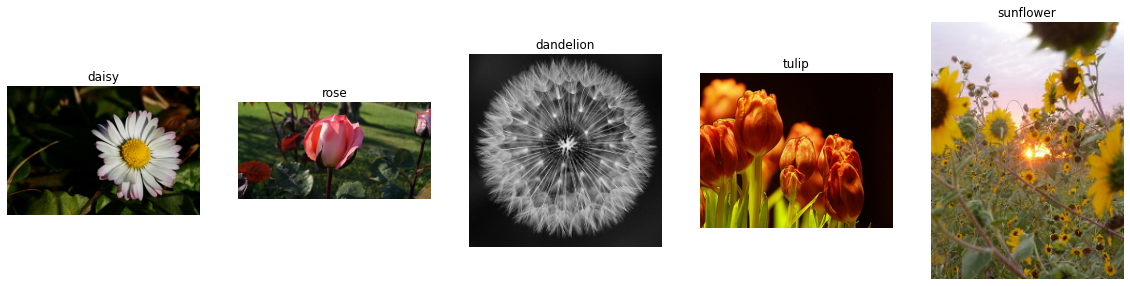

In [16]:
# create the figure
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,20))
# flatten the axis into a 1-d array to make it easier to access each axes
axs = axs.flatten()
# iterate through and enumerate the files, use i to index the axes
for i, file in enumerate(sample_images):
    # read the image in
    pic = plt.imread(file)
    # add the image to the axes
    axs[i].imshow(pic)
    # add an axes title; .stem is a pathlib method to get the filename
    axs[i].set(title=str(folder_names[i]))
    axs[i].set_axis_off()


# MODEL BUILDING WITH TRANSFER LEARNING

The approach envisaged for solution is to get the images ready for model fit using ImageDataGenerator . 

In deep learning, transfer learning is a technique whereby a neural network model is first trained on a problem similar to the problem that is being solved. One or more layers from the trained model are then used in a new model trained on the problem of interest.Transfer learning has the benefit of decreasing the training time for a neural network model and can result in lower generalization error.

It is intended to try multiple popular trained models(atleast two due to GPU resourse limitation!) on the problem at hand. Keras provides access to a number of top-performing pre-trained models that were developed for image recognition tasks. Then the best pre-trained model can be fine tuned for better performance. The best model is decided on the model performance on the test data which is unseen data and getting the evaluation score from the dphi website .

In [17]:
# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
#support libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### PREPARATION OF TRAIN AND VALIDATION DATA

reference : https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

We can use ImageDataGenerator() effectively for creating our train,test and validation data. 

The data can be preparared from .flow_from_directory(directory) or flow_from_dataframe() option. It is intended to create the train and validation dataset from first option and test dataset from dataframe(as the csv file with sequence of prediction images has been provided ). The ImageDataGenerator() can also help in data augmentation . That option is kept for a later trial subject to resourse availability.

In [18]:
# lets create a function to get train , validation 
train_image_generator = ImageDataGenerator(rescale=1/255) #for the start defining a basic ImageDataGenerator
val_image_generator = ImageDataGenerator(rescale=1/255)
def get_data(IMAGE_SHAPE,batch_size=32):
  ''' This function takes image shape and batch size(default =32) and creates train and val datagen from directory'''
  #make train data generator
  train_data_gen = train_image_generator.flow_from_directory(directory='/content/flowers/flowers/train', batch_size=batch_size,class_mode='categorical',
                                                        target_size=(IMAGE_SHAPE[0], IMAGE_SHAPE[1]))
  # make the validation dataset generator
  val_data_gen = val_image_generator.flow_from_directory(directory='/content/flowers/flowers/validation', batch_size=batch_size, class_mode='categorical',
                                                         target_size=(IMAGE_SHAPE[0], IMAGE_SHAPE[1]))
  return train_data_gen,val_data_gen

###PREPARATION OF TEST DATA FOR PREDICTION

In [19]:
#Predict The Output For Testing Dataset 
# Loading the order of the image's name that has been provided
test_image_sequence = pd.read_csv("/content/flowers/flowers/Testing_set_flower.csv")
test_image_sequence.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [20]:
#Getting images file path
# stores filename and path to that file in a list of lists
test_file_paths = [[fname, '/content/flowers/flowers/test' + fname] for fname in test_image_sequence['filename']]

In [21]:
test_file_paths[:3] # check first 3 test images 

[['Image_1.jpg', '/content/flowers/flowers/testImage_1.jpg'],
 ['Image_2.jpg', '/content/flowers/flowers/testImage_2.jpg'],
 ['Image_3.jpg', '/content/flowers/flowers/testImage_3.jpg']]

In [22]:
#Confirm if number of images in test folder is same as number of image names in 'Testing_set_flower.csv'
if len(test_image_sequence) == len(test_file_paths):
  print('Number of image names i.e. ', len(test_image_sequence), 'matches the number of file paths i.e. ', len(test_file_paths))
else:
  print('Number of image names does not match the number of filepaths')

Number of image names i.e.  924 matches the number of file paths i.e.  924


In [23]:
#Converting the test_file_paths to dataframe
test_images = pd.DataFrame(test_file_paths, columns=['filename', 'filepaths'])
test_images.head()

,filename,filepaths
0,Image_1.jpg,/content/flowers/flowers/testImage_1.jpg
1,Image_2.jpg,/content/flowers/flowers/testImage_2.jpg
2,Image_3.jpg,/content/flowers/flowers/testImage_3.jpg
3,Image_4.jpg,/content/flowers/flowers/testImage_4.jpg
4,Image_5.jpg,/content/flowers/flowers/testImage_5.jpg


In [38]:
def get_test_data(image_size):
  '''this function takes in a image shape and returns a test datagenerator for further prediction'''
  test_datagen=ImageDataGenerator(rescale=1./255.)
  test_generator=test_datagen.flow_from_dataframe(
                                  directory='/content/flowers/flowers/test',
                                  dataframe=test_images,
                                  batch_size=32,
                                  seed=42,
                                  shuffle=False,
                                  class_mode=None,
                                  target_size=image_size)
  return test_generator



## TRANSFER LEARNING WITH MOBILENET

Google MobileNetV2, which belongs to a family of general purpose computer vision neural networks designed with mobile devices in mind to support classification, detection and more. MobileNetV2 is a significant improvement over MobileNetV1 and pushes the state of the art for mobile visual recognition including classification, object detection and semantic segmentation. As these are designed with mobile devices in mind, models are light weight and requires low computational power. 

In [25]:
def create_mobilenet_model():
  ''' this function creates a mobilenet model with layers are not trainable'''
  # define a feature extractor from tf hub
  feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
  # using the above feature extractor define a feature_extractor_layer
  feature_extractor_layer = hub.KerasLayer(feature_extractor,input_shape=(224,224,3))
  # assign trainable as false
  feature_extractor_layer.trainable=False
  # define a keras sequential model 
  mobilenet_model = tf.keras.Sequential()
  mobilenet_model.add(feature_extractor_layer) # mobilenet forms the initial layer of sequential model
  #model.add(keras.layers.Dropout(0.3))
  mobilenet_model.add(keras.layers.Dense(5,activation='softmax')) # final layer with 5 outputs
  return mobilenet_model

In [26]:
mobilenet = create_mobilenet_model() #function call to create a basic mobilenet model
mobilenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [27]:
#compile mobilenet model
mobilenet.compile(
    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = ['accuracy']
)

We are defining 3 callbacks for our model. One is earlystopping which prevents overfitting by stopping the training process once validation accuracy is no more increasing.

Second is using ModelCheckpoint to save the best model

Third is ReduceLROnPlateau() which reduces the learning rate as we approach minima (metrics stops improving and smaller steps are taken)

In [28]:
# define some callbacks
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=0, mode='max')
mcp_save = ModelCheckpoint('mobilenet_v1_{epoch:02d}_{val_accuracy:.3f}.h5', save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')#Reduce learning rate when a metric has stopped improving

In [29]:
# create train and validation data generator
train, validation = get_data(IMAGE_SHAPE=(224,224),batch_size=32)

Found 2198 images belonging to 5 classes.
Found 548 images belonging to 5 classes.


Now we can train the model on train and check performance on validation

In [30]:
history_mobilenet = mobilenet.fit(train,epochs=50,validation_data=validation,callbacks=[earlyStopping, mcp_save, reduce_lr_loss]) # fit the mobilenet model on train dataset

Epoch 1/50
69/69 [==============================] - 26s 189ms/step - loss: 0.8570 - accuracy: 0.6756 - val_loss: 0.5240 - val_accuracy: 0.8066 - lr: 0.0010
Epoch 2/50
69/69 [==============================] - 12s 173ms/step - loss: 0.4088 - accuracy: 0.8617 - val_loss: 0.4162 - val_accuracy: 0.8504 - lr: 0.0010
Epoch 3/50
69/69 [==============================] - 12s 171ms/step - loss: 0.3151 - accuracy: 0.8976 - val_loss: 0.3768 - val_accuracy: 0.8704 - lr: 0.0010
Epoch 4/50
69/69 [==============================] - 12s 171ms/step - loss: 0.2598 - accuracy: 0.9227 - val_loss: 0.3426 - val_accuracy: 0.8814 - lr: 0.0010
Epoch 5/50
69/69 [==============================] - 12s 172ms/step - loss: 0.2202 - accuracy: 0.9313 - val_loss: 0.3350 - val_accuracy: 0.8832 - lr: 0.0010
Epoch 6/50
69/69 [==============================] - 12s 171ms/step - loss: 0.1984 - accuracy: 0.9440 - val_loss: 0.3222 - val_accuracy: 0.8850 - lr: 0.0010
Epoch 7/50
69/69 [==============================] - 12s 170ms/st

We can plot both accuracy and loss of train and validation data to get overall picture of training process

In [31]:
def plot_graphs(history):
  '''This function plots train and val accuracy as well as losses to examine overfitting'''
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

TRAINING- MOBILENET VERSION 1



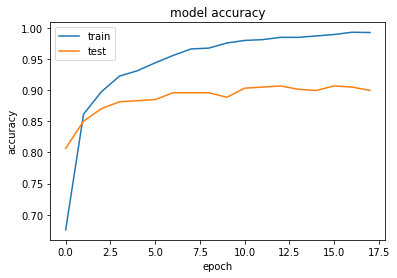

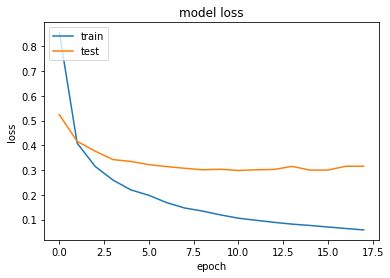

In [32]:
print("TRAINING- MOBILENET VERSION 1\n")
plot_graphs(history_mobilenet)

In [40]:
mobilenet_test_data = get_test_data(image_size=(224,224)) # test data function call

Found 924 validated image filenames.


we will create a function to predict class of flowers from test data

In [41]:
def predict_test_data(model,test_data,labels):
  '''This function takes model,test data and labels and returns df of predictions for submission
  labels is a dictionary of class indices from train generator'''
  probabilities = model.predict(test_data)
  predicted_class_indices=np.argmax(probabilities,axis=1)
  labels = dict((v,k) for k,v in labels.items()) # swapping key and values in labels for prediction
  predictions = [labels[k] for k in predicted_class_indices]
  results=pd.DataFrame({"prediction":predictions})
  return results 

In [43]:
labels = (train.class_indices)
mobilenet_result = predict_test_data(mobilenet,mobilenet_test_data,labels=labels) # the dataframe of results for mobilenet model

In [44]:
mobilenet_result['prediction'].value_counts() #crosscheck on predictions vs total test data

dandelion    238
sunflower    211
tulip        183
rose         160
daisy        132
Name: prediction, dtype: int64

In [45]:
mobilenet_result.to_csv('mobilenetv2_firstrun.csv',index=False)

## USING INCEPTIONV3 MODEL

https://keras.io/api/applications/inceptionv3/

Inception v3 is a widely-used image recognition model that has been shown to attain greater than 78.1% accuracy on the ImageNet dataset. The model is the culmination of many ideas developed by multiple researchers over the years. It is based on the original paper: "Rethinking the Inception Architecture for Computer Vision" by Szegedy, et. al.

Scrutiny of information in documentation reveals the pre trained models can be used in couple of different ways. The url from tfhub  or keras.applications can  be used to create model

In [46]:
from tensorflow import keras
from keras.applications.inception_v3 import InceptionV3 
from keras.layers import Input, Dense, Flatten
from keras.models import Model

Input shape is Optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (299, 299, 3)

In [47]:
inception_image_size = (299,299)
inception = InceptionV3(input_shape=(299,299,3),weights='imagenet', include_top=False) #define base model

87924736/87910968 [==============================] - 2s 0us/step


In [48]:
# freeze all the weights of the model except the last 4 layers
for layer in inception.layers:
    layer.trainable = False

In an real world scenerio we can also train model by training the entire model (layer.trainable=False) . But flip side is computation required

In [49]:
base_output = Flatten()(inception.output) #create a vector from output of inception model
# dense_layer = Dense(1024, activation='relu')(base_output) optional layer can be added for trials to improve performance
outputs = Dense(5, activation='softmax')(base_output)

# create a model object
model_inception = Model(inputs=inception.input, outputs=outputs)

# view the structure of the model
model_inception.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [50]:
# compile the model
model_inception.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [51]:
# get train and val data
train_inception,val_inception= get_data(IMAGE_SHAPE=(299,299),batch_size=32)

Found 2198 images belonging to 5 classes.
Found 548 images belonging to 5 classes.


In [52]:
# define  callbacks
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=0, mode='max')
mcp_save = ModelCheckpoint('inception_v1_{epoch:02d}_{val_accuracy:.3f}.h5', save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')#Reduce learning rate when a metric has stopped improving

In [53]:
history_inception = model_inception.fit(train_inception,epochs=50,validation_data=val_inception,callbacks=[earlyStopping, mcp_save, reduce_lr_loss]) # fit the mobilenet model on train dataset

Epoch 1/50
69/69 [==============================] - 39s 450ms/step - loss: 4.6977 - accuracy: 0.7325 - val_loss: 2.2397 - val_accuracy: 0.8339 - lr: 0.0010
Epoch 2/50
69/69 [==============================] - 25s 368ms/step - loss: 0.5928 - accuracy: 0.9395 - val_loss: 1.6977 - val_accuracy: 0.8777 - lr: 0.0010
Epoch 3/50
69/69 [==============================] - 25s 358ms/step - loss: 0.2868 - accuracy: 0.9622 - val_loss: 1.9256 - val_accuracy: 0.8595 - lr: 0.0010
Epoch 4/50
69/69 [==============================] - 25s 358ms/step - loss: 0.3373 - accuracy: 0.9641 - val_loss: 2.4658 - val_accuracy: 0.8723 - lr: 0.0010
Epoch 5/50
69/69 [==============================] - 25s 359ms/step - loss: 0.2194 - accuracy: 0.9754 - val_loss: 2.8894 - val_accuracy: 0.8577 - lr: 0.0010
Epoch 6/50
69/69 [==============================] - 26s 370ms/step - loss: 0.1025 - accuracy: 0.9841 - val_loss: 2.4728 - val_accuracy: 0.8796 - lr: 0.0010
Epoch 7/50
69/69 [==============================] - 25s 359ms/st

TRAINING- InceptionV3  VERSION 1



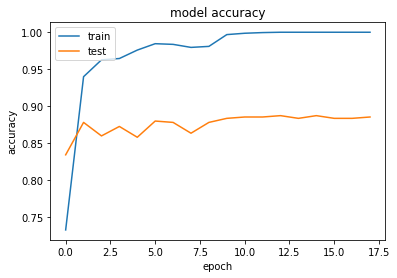

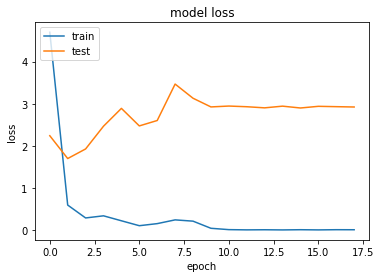

In [54]:
print("TRAINING- InceptionV3  VERSION 1\n")
plot_graphs(history_inception)

In [55]:
labels = (train_inception.class_indices) #dictionary of class labels

In [56]:
labels

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [57]:
test_inception = get_test_data(image_size=(299,299)) # test data

Found 924 validated image filenames.


In [58]:
inception_result = predict_test_data(model_inception,test_inception,labels=labels) # the dataframe of results for inception model by function call

In [59]:
inception_result.to_csv('inceptionv3_firstrun.csv',index=False)

## MODEL IMPROVEMENTS (FINE TUNING)

The scores obtained by inceptionV3 and mobilenet basic model on the test scores is as follows

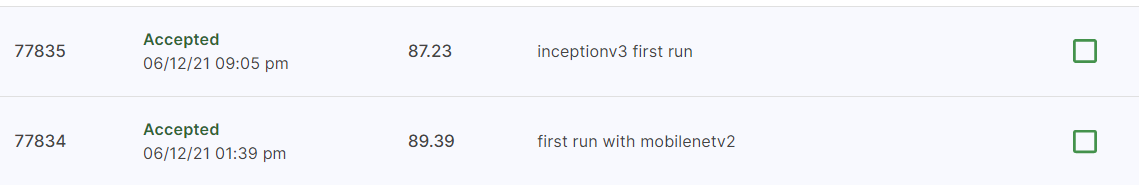

It is seen that both models have done reasonably well in the first run . However, as the mobilenetv2 model has performed slightly better , we will choose this model and attempt to improve the performance (multiple runs are restricted mostly due to availability of GPU !)

It is seen from the accuracy curve for mobilenet that there is some amount of overfitting despite our callback

we will try and incorporate a dropout layer in the model to see if the overfitting can be reduced.

### MOBILENET WITH DROPOUT LAYER

In [60]:
def create_mobilenet_model_with_dropout():
  ''' this function creates a mobilenet model with layers are not trainable'''
  # define a feature extractor from tf hub
  feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
  # using the above feature extractor define a feature_extractor_layer
  feature_extractor_layer = hub.KerasLayer(feature_extractor,input_shape=(224,224,3))
  # assign trainable as false
  feature_extractor_layer.trainable=False
  # define a keras sequential model 
  mobilenet_model = tf.keras.Sequential()
  mobilenet_model.add(feature_extractor_layer) # mobilenet forms the initial layer of sequential model
  mobilenet_model.add(keras.layers.Dropout(0.3)) # dropout f 0.3 is used (again can be iterated for optimum)
  mobilenet_model.add(keras.layers.Dense(5,activation='softmax')) # final layer with 5 outputs
  return mobilenet_model

In [61]:
mobilenet_v2 = create_mobilenet_model_with_dropout()
mobilenet_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [62]:
#compile mobilenet model with dropout
mobilenet_v2.compile(
    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [63]:
# define some callbacks
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=0, mode='max')
mcp_save = ModelCheckpoint('mobilenet_v2_{epoch:02d}_{val_accuracy:.3f}.h5', save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')#Reduce learning rate when a metric has stopped improving

In [64]:
# create train and validation data generator
train, validation = get_data(IMAGE_SHAPE=(224,224),batch_size=32)

Found 2198 images belonging to 5 classes.
Found 548 images belonging to 5 classes.


In [65]:
history_mobilenet_v2 = mobilenet_v2.fit(train,epochs=50,validation_data=validation,callbacks=[earlyStopping, mcp_save, reduce_lr_loss]) # fit the mobilenet model on train dataset

Epoch 1/50
69/69 [==============================] - 16s 183ms/step - loss: 0.9941 - accuracy: 0.6128 - val_loss: 0.5413 - val_accuracy: 0.7901 - lr: 0.0010
Epoch 2/50
69/69 [==============================] - 12s 173ms/step - loss: 0.4978 - accuracy: 0.8239 - val_loss: 0.4228 - val_accuracy: 0.8504 - lr: 0.0010
Epoch 3/50
69/69 [==============================] - 12s 170ms/step - loss: 0.3868 - accuracy: 0.8708 - val_loss: 0.3743 - val_accuracy: 0.8540 - lr: 0.0010
Epoch 4/50
69/69 [==============================] - 12s 170ms/step - loss: 0.3218 - accuracy: 0.8963 - val_loss: 0.3459 - val_accuracy: 0.8741 - lr: 0.0010
Epoch 5/50
69/69 [==============================] - 12s 172ms/step - loss: 0.2839 - accuracy: 0.9067 - val_loss: 0.3170 - val_accuracy: 0.8850 - lr: 0.0010
Epoch 6/50
69/69 [==============================] - 12s 172ms/step - loss: 0.2556 - accuracy: 0.9126 - val_loss: 0.3192 - val_accuracy: 0.8923 - lr: 0.0010
Epoch 7/50
69/69 [==============================] - 12s 167ms/st

TRAINING- MOBILENET VERSION 2 WITH DROPOUT LAYER



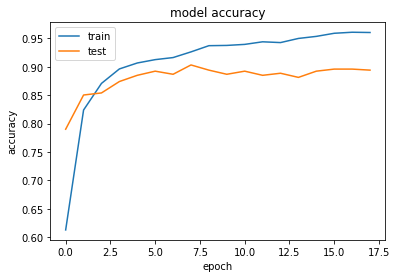

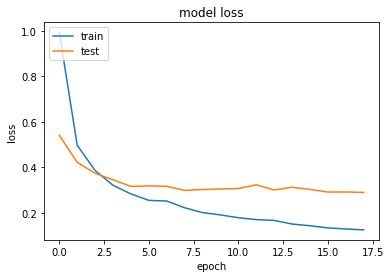

In [66]:
print("TRAINING- MOBILENET VERSION 2 WITH DROPOUT LAYER\n")
plot_graphs(history_mobilenet_v2)

In [67]:
mobilenet_test_data = get_test_data(image_size=(224,224)) # test data

Found 924 validated image filenames.


In [68]:
labels = (train.class_indices)

In [69]:
mobilenet_v2_result = predict_test_data(mobilenet_v2,mobilenet_test_data,labels) # the dataframe of results for mobilenet model

In [70]:
import time
t = time.localtime()
timestamp = time.strftime('%b-%d-%Y_%H%M', t)
timestamp

'Dec-08-2021_0054'

In [71]:
filename = f'mobilenet_v2_withdropout{timestamp}.csv'
mobilenet_v2_result.to_csv(filename,index=False)

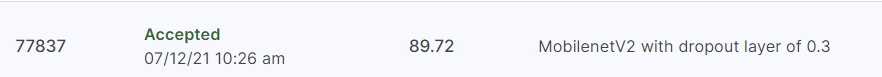

The model with dropout did reduce some amount of overfitting and performance also improved marginally

## MOBILENET MODEL WITH DATA AUGMENTATION

We will use minor data augementation using ImageDataGenerator and build a mobilenet model 

Only train datasets is modified

In [72]:
import time
t = time.localtime()
timestamp = time.strftime('%b-%d-%Y_%H%M', t)
timestamp

'Dec-08-2021_0055'

In [73]:
train_image_generator = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_image_generator = ImageDataGenerator(rescale = 1./255)
train,val = get_data(IMAGE_SHAPE=(224,224),batch_size=32)

Found 2198 images belonging to 5 classes.
Found 548 images belonging to 5 classes.


In [74]:
# define some callbacks
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=0, mode='max')
mcp_save = ModelCheckpoint('mobilenet_v3_{epoch:02d}_{val_accuracy:.3f}.h5', save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')#Reduce learning rate when a metric has stopped improving

In [75]:
history_mobilenet_v3 = mobilenet_v2.fit(train,epochs=50,validation_data=val,callbacks=[earlyStopping, mcp_save, reduce_lr_loss]) # fit the mobilenet model on train dataset

Epoch 1/50
69/69 [==============================] - 33s 482ms/step - loss: 0.2549 - accuracy: 0.9076 - val_loss: 0.3039 - val_accuracy: 0.8996 - lr: 1.0000e-04
Epoch 2/50
69/69 [==============================] - 33s 479ms/step - loss: 0.2590 - accuracy: 0.9026 - val_loss: 0.3038 - val_accuracy: 0.8942 - lr: 1.0000e-04
Epoch 3/50
69/69 [==============================] - 33s 473ms/step - loss: 0.2538 - accuracy: 0.9095 - val_loss: 0.3053 - val_accuracy: 0.8960 - lr: 1.0000e-04
Epoch 4/50
69/69 [==============================] - 33s 471ms/step - loss: 0.2417 - accuracy: 0.9126 - val_loss: 0.3015 - val_accuracy: 0.8996 - lr: 1.0000e-04
Epoch 5/50
69/69 [==============================] - 33s 478ms/step - loss: 0.2453 - accuracy: 0.9086 - val_loss: 0.3036 - val_accuracy: 0.8960 - lr: 1.0000e-04
Epoch 6/50
69/69 [==============================] - 33s 474ms/step - loss: 0.2312 - accuracy: 0.9158 - val_loss: 0.3035 - val_accuracy: 0.8996 - lr: 1.0000e-04


In [76]:
labels = (train.class_indices)
mobilenet_v3_result = predict_test_data(mobilenet_v2,mobilenet_test_data,labels) # the dataframe of results for mobilenet model

Save the dataframe of predictions to a csv file for submission

In [78]:
filename = f'mobilenet_v2_withdropout_aug{timestamp}.csv'
mobilenet_v3_result.to_csv(filename,index=False)

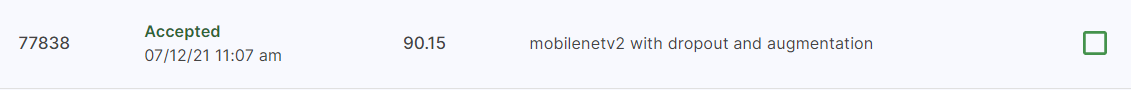

The above score was position 8 in Leaderboard. It is seen that augmentation of train images has improved the test score marginally and reached 90% accuracy for test score. 

WE will conclude this as final model. Further finetuning by changing the learning rate, optimizer , dropout rate etc can be attempted and view limited resourses in terms of GPU , and reasonable accuracy obtained from the final model , the model is being finalized.

##Prediction on a single image by final model

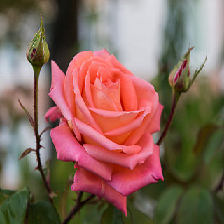

In [79]:
from keras.preprocessing import image
img = image.load_img('/content/test_rose.jpg.jpg',target_size=(224,224))
img

In [80]:
labels = dict((v,k) for k,v in labels.items()) #class labels

In [81]:
X = np.array(img,dtype='float32')
X = X/255
X = np.expand_dims(X, axis=0)
print('predicted image is',labels[mobilenet_v2.predict([X]).argmax()])

predicted image is rose


In [83]:
mobilenet_v2.save('mobilenet_final') #save final model 


INFO:tensorflow:Assets written to: mobilenet_final/assets


INFO:tensorflow:Assets written to: mobilenet_final/assets


In [84]:
loaded_model = tf.keras.models.load_model('mobilenet_final') #load model 

In [85]:
print('predicted image is',labels[loaded_model.predict([X]).argmax()]) #predict loaded model on flower image

predicted image is rose


In [86]:
!zip -r model.zip /content/mobilenet_final  # zip for downloading the model folder

  adding: content/mobilenet_final/ (stored 0%)
  adding: content/mobilenet_final/variables/ (stored 0%)
  adding: content/mobilenet_final/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/mobilenet_final/variables/variables.index (deflated 78%)
  adding: content/mobilenet_final/keras_metadata.pb (deflated 81%)
  adding: content/mobilenet_final/saved_model.pb (deflated 91%)
  adding: content/mobilenet_final/assets/ (stored 0%)
